In [1]:
#Bibliotecas necessárias para este projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl 
from IPython.display import display
from sklearn.preprocessing import StandardScaler

#mostrar gráficos em notebook
%matplotlib inline

In [2]:
#Carregar arquivo csv para dataframe
df_trombose = pd.read_csv("exploration_data_trombose.csv")
df_trombose.head(10)

,aCL IgG,aCL IgM,ANA,ANA Pattern,aCL IgA,Diagnosis,KCT,RVVT,LAC,Thrombosis
0,1.3,1.6,256,P,0.0,"MCTD,AMI",NaN,NaN,-,1
1,4.3,4.6,256,"P,S",3.3,SLE,-,-,-,0
2,2.3,2.5,0,NaN,3.5,PSS,NaN,NaN,NaN,0
3,0.0,0.0,16,S,0.0,NaN,NaN,NaN,-,0
4,0.0,4.0,4,P,0.0,"SLE,SjS,vertigo",NaN,NaN,NaN,0
5,1.0,2.4,1024,S,0.0,SLE,-,-,-,0
6,6.1,9.5,4096,S,8.7,NaN,-,+,+,2
7,3.7,3.0,256,P,12.3,"SLE,AIHA",+,+,+,0
8,0.0,0.0,16,"P,S",0.0,Raynaud,NaN,NaN,NaN,0
9,1.7,0.0,16,P,22.5,"Cryoglobulin,RA",NaN,NaN,NaN,1


In [3]:
df_trombose.shape

(805, 10)

In [4]:
df_trombose.dtypes

aCL IgG        float64
aCL IgM        float64
ANA             object
ANA Pattern     object
aCL IgA        float64
Diagnosis       object
KCT             object
RVVT            object
LAC             object
Thrombosis       int64
dtype: object

In [5]:
#Convertendo valor objeto da Coluna 'ANA' em inteiro
df_trombose['ANA'] = pd.to_numeric(df_trombose['ANA'], errors='coerce')
df_trombose.dtypes

aCL IgG        float64
aCL IgM        float64
ANA            float64
ANA Pattern     object
aCL IgA        float64
Diagnosis       object
KCT             object
RVVT            object
LAC             object
Thrombosis       int64
dtype: object

In [6]:
df_trombose.head(10)

,aCL IgG,aCL IgM,ANA,ANA Pattern,aCL IgA,Diagnosis,KCT,RVVT,LAC,Thrombosis
0,1.3,1.6,256.0,P,0.0,"MCTD,AMI",NaN,NaN,-,1
1,4.3,4.6,256.0,"P,S",3.3,SLE,-,-,-,0
2,2.3,2.5,0.0,NaN,3.5,PSS,NaN,NaN,NaN,0
3,0.0,0.0,16.0,S,0.0,NaN,NaN,NaN,-,0
4,0.0,4.0,4.0,P,0.0,"SLE,SjS,vertigo",NaN,NaN,NaN,0
5,1.0,2.4,1024.0,S,0.0,SLE,-,-,-,0
6,6.1,9.5,4096.0,S,8.7,NaN,-,+,+,2
7,3.7,3.0,256.0,P,12.3,"SLE,AIHA",+,+,+,0
8,0.0,0.0,16.0,"P,S",0.0,Raynaud,NaN,NaN,NaN,0
9,1.7,0.0,16.0,P,22.5,"Cryoglobulin,RA",NaN,NaN,NaN,1


## Pré-processar Colunas de Atributos

### Variável Dummy para Coluna 'ANA Pattern'

In [7]:
#Usando Dummy variável
dummies = df_trombose['ANA Pattern'].str.join(sep=',').str.get_dummies(sep=',')
dummies.head()

,D,N,P,S
0,0,0,1,0
1,0,0,1,1
2,0,0,0,0
3,0,0,0,1
4,0,0,1,0


In [8]:
dummies = dummies.apply(lambda row: np.nan if (row==0).all() else row, axis=1)
dummies.head(10)

,D,N,P,S
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0
2,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,1.0
7,0.0,0.0,1.0,0.0
8,0.0,0.0,1.0,1.0
9,0.0,0.0,1.0,0.0


In [9]:
#Colocando sufixo na tabela
#dummies.columns = ['ANA Pattern_' + str(col) for col in dummies.columns]
dummies = dummies.add_suffix('_ANA Pattern')
dummies.head()

,D_ANA Pattern,N_ANA Pattern,P_ANA Pattern,S_ANA Pattern
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0
2,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0


In [10]:
df_trombose.head()

,aCL IgG,aCL IgM,ANA,ANA Pattern,aCL IgA,Diagnosis,KCT,RVVT,LAC,Thrombosis
0,1.3,1.6,256.0,P,0.0,"MCTD,AMI",NaN,NaN,-,1
1,4.3,4.6,256.0,"P,S",3.3,SLE,-,-,-,0
2,2.3,2.5,0.0,NaN,3.5,PSS,NaN,NaN,NaN,0
3,0.0,0.0,16.0,S,0.0,NaN,NaN,NaN,-,0
4,0.0,4.0,4.0,P,0.0,"SLE,SjS,vertigo",NaN,NaN,NaN,0


In [11]:
#Concatenar dummies com dataframe
#df = pd.concat([df, pd.get_dummies(df['YEAR'])], axis=1);
df_trombose = pd.concat([df_trombose,dummies], axis=1)

In [12]:
df_trombose = df_trombose.drop(['ANA Pattern'], axis=1)
df_trombose.head(10)

,aCL IgG,aCL IgM,ANA,aCL IgA,Diagnosis,KCT,RVVT,LAC,Thrombosis,D_ANA Pattern,N_ANA Pattern,P_ANA Pattern,S_ANA Pattern
0,1.3,1.6,256.0,0.0,"MCTD,AMI",NaN,NaN,-,1,0.0,0.0,1.0,0.0
1,4.3,4.6,256.0,3.3,SLE,-,-,-,0,0.0,0.0,1.0,1.0
2,2.3,2.5,0.0,3.5,PSS,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,0.0,0.0,16.0,0.0,NaN,NaN,NaN,-,0,0.0,0.0,0.0,1.0
4,0.0,4.0,4.0,0.0,"SLE,SjS,vertigo",NaN,NaN,NaN,0,0.0,0.0,1.0,0.0
5,1.0,2.4,1024.0,0.0,SLE,-,-,-,0,0.0,0.0,0.0,1.0
6,6.1,9.5,4096.0,8.7,NaN,-,+,+,2,0.0,0.0,0.0,1.0
7,3.7,3.0,256.0,12.3,"SLE,AIHA",+,+,+,0,0.0,0.0,1.0,0.0
8,0.0,0.0,16.0,0.0,Raynaud,NaN,NaN,NaN,0,0.0,0.0,1.0,1.0
9,1.7,0.0,16.0,22.5,"Cryoglobulin,RA",NaN,NaN,NaN,1,0.0,0.0,1.0,0.0


### Replace valores de KCT, RVVT, LAC

In [13]:
df_trombose[['KCT','RVVT','LAC']] = df_trombose[['KCT','RVVT','LAC']].replace(['+', '-'], [1, 0])

In [14]:
df_trombose.head(20)

,aCL IgG,aCL IgM,ANA,aCL IgA,Diagnosis,KCT,RVVT,LAC,Thrombosis,D_ANA Pattern,N_ANA Pattern,P_ANA Pattern,S_ANA Pattern
0,1.3,1.6,256.0,0.0,"MCTD,AMI",NaN,NaN,0.0,1,0.0,0.0,1.0,0.0
1,4.3,4.6,256.0,3.3,SLE,0.0,0.0,0.0,0,0.0,0.0,1.0,1.0
2,2.3,2.5,0.0,3.5,PSS,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,0.0,0.0,16.0,0.0,NaN,NaN,NaN,0.0,0,0.0,0.0,0.0,1.0
4,0.0,4.0,4.0,0.0,"SLE,SjS,vertigo",NaN,NaN,NaN,0,0.0,0.0,1.0,0.0
5,1.0,2.4,1024.0,0.0,SLE,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0
6,6.1,9.5,4096.0,8.7,NaN,0.0,1.0,1.0,2,0.0,0.0,0.0,1.0
7,3.7,3.0,256.0,12.3,"SLE,AIHA",1.0,1.0,1.0,0,0.0,0.0,1.0,0.0
8,0.0,0.0,16.0,0.0,Raynaud,NaN,NaN,NaN,0,0.0,0.0,1.0,1.0
9,1.7,0.0,16.0,22.5,"Cryoglobulin,RA",NaN,NaN,NaN,1,0.0,0.0,1.0,0.0


### Remover linhas que contem valores nulos em atributo 'Diagnosis'

In [15]:
df_trombose = df_trombose.dropna(axis=0, subset=['Diagnosis'])

In [16]:
df_trombose.shape

(470, 13)

### Variável Dummy para Coluna 'Diagnosis'

In [17]:
#Usando Dummy variável
dummies2 = df_trombose['Diagnosis'].str.get_dummies(sep=',')
dummies2.head(10)

,ABN,AGA,AIHA,AMI,AP,APS,APTT Elongation,ARF,Adult Still,Amyopathic,...,paniculitis,polyarthralgia,preg,protein loosing,pulmonary emboli,thrombocytopenia,uveitis,varix,vasculitis,vertigo
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#Colocando sufixo na tabela
#dummies.columns = ['ANA Pattern_' + str(col) for col in dummies.columns]
dummies2 = dummies2.add_suffix('_Diagnosis')
dummies2.head()

,ABN_Diagnosis,AGA_Diagnosis,AIHA_Diagnosis,AMI_Diagnosis,AP_Diagnosis,APS_Diagnosis,APTT Elongation_Diagnosis,ARF_Diagnosis,Adult Still_Diagnosis,Amyopathic_Diagnosis,...,paniculitis_Diagnosis,polyarthralgia_Diagnosis,preg_Diagnosis,protein loosing _Diagnosis,pulmonary emboli_Diagnosis,thrombocytopenia_Diagnosis,uveitis_Diagnosis,varix_Diagnosis,vasculitis_Diagnosis,vertigo_Diagnosis
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#Concatenar dummies com data frame
#df = pd.concat([df, pd.get_dummies(df['YEAR'])], axis=1);
df_trombose = pd.concat([df_trombose,dummies2], axis=1)
df_trombose.head()

,aCL IgG,aCL IgM,ANA,aCL IgA,Diagnosis,KCT,RVVT,LAC,Thrombosis,D_ANA Pattern,...,paniculitis_Diagnosis,polyarthralgia_Diagnosis,preg_Diagnosis,protein loosing _Diagnosis,pulmonary emboli_Diagnosis,thrombocytopenia_Diagnosis,uveitis_Diagnosis,varix_Diagnosis,vasculitis_Diagnosis,vertigo_Diagnosis
0,1.3,1.6,256.0,0.0,"MCTD,AMI",NaN,NaN,0.0,1,0.0,...,0,0,0,0,0,0,0,0,0,0
1,4.3,4.6,256.0,3.3,SLE,0.0,0.0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2.3,2.5,0.0,3.5,PSS,NaN,NaN,NaN,0,NaN,...,0,0,0,0,0,0,0,0,0,0
4,0.0,4.0,4.0,0.0,"SLE,SjS,vertigo",NaN,NaN,NaN,0,0.0,...,0,0,0,0,0,0,0,0,0,1
5,1.0,2.4,1024.0,0.0,SLE,0.0,0.0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df_trombose = df_trombose.drop(['Diagnosis'], axis=1)
df_trombose.head(10)

,aCL IgG,aCL IgM,ANA,aCL IgA,KCT,RVVT,LAC,Thrombosis,D_ANA Pattern,N_ANA Pattern,...,paniculitis_Diagnosis,polyarthralgia_Diagnosis,preg_Diagnosis,protein loosing _Diagnosis,pulmonary emboli_Diagnosis,thrombocytopenia_Diagnosis,uveitis_Diagnosis,varix_Diagnosis,vasculitis_Diagnosis,vertigo_Diagnosis
0,1.3,1.6,256.0,0.0,NaN,NaN,0.0,1,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,4.3,4.6,256.0,3.3,0.0,0.0,0.0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2.3,2.5,0.0,3.5,NaN,NaN,NaN,0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,0.0,4.0,4.0,0.0,NaN,NaN,NaN,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
5,1.0,2.4,1024.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7,3.7,3.0,256.0,12.3,1.0,1.0,1.0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
8,0.0,0.0,16.0,0.0,NaN,NaN,NaN,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
9,1.7,0.0,16.0,22.5,NaN,NaN,NaN,1,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
12,5.1,4.1,16.0,3.1,0.0,0.0,0.0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
13,0.0,6.1,64.0,9.1,NaN,NaN,NaN,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#Copiar coluna Trombose para outro dataframe, e recolocá-lo no final do dataframe
label = df_trombose['Thrombosis'].copy()
label.head()

0    1
1    0
2    0
4    0
5    0
Name: Thrombosis, dtype: int64

In [22]:
df_trombose = df_trombose.drop(['Thrombosis'], axis=1)
df_trombose.head(10)

,aCL IgG,aCL IgM,ANA,aCL IgA,KCT,RVVT,LAC,D_ANA Pattern,N_ANA Pattern,P_ANA Pattern,...,paniculitis_Diagnosis,polyarthralgia_Diagnosis,preg_Diagnosis,protein loosing _Diagnosis,pulmonary emboli_Diagnosis,thrombocytopenia_Diagnosis,uveitis_Diagnosis,varix_Diagnosis,vasculitis_Diagnosis,vertigo_Diagnosis
0,1.3,1.6,256.0,0.0,NaN,NaN,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,4.3,4.6,256.0,3.3,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2.3,2.5,0.0,3.5,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,0.0,4.0,4.0,0.0,NaN,NaN,NaN,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
5,1.0,2.4,1024.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7,3.7,3.0,256.0,12.3,1.0,1.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
8,0.0,0.0,16.0,0.0,NaN,NaN,NaN,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
9,1.7,0.0,16.0,22.5,NaN,NaN,NaN,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
12,5.1,4.1,16.0,3.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
13,0.0,6.1,64.0,9.1,NaN,NaN,NaN,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df_trombose = pd.concat([df_trombose,label], axis=1)
df_trombose.head()

,aCL IgG,aCL IgM,ANA,aCL IgA,KCT,RVVT,LAC,D_ANA Pattern,N_ANA Pattern,P_ANA Pattern,...,polyarthralgia_Diagnosis,preg_Diagnosis,protein loosing _Diagnosis,pulmonary emboli_Diagnosis,thrombocytopenia_Diagnosis,uveitis_Diagnosis,varix_Diagnosis,vasculitis_Diagnosis,vertigo_Diagnosis,Thrombosis
0,1.3,1.6,256.0,0.0,NaN,NaN,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
1,4.3,4.6,256.0,3.3,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2.3,2.5,0.0,3.5,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,0.0,4.0,4.0,0.0,NaN,NaN,NaN,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
5,1.0,2.4,1024.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


## Mean Imputation

A imputação média substitui os valores faltantes pelo valor médio dessa variável. A imputação média é um dos métodos de imputação mais "ingênuos" porque, ao contrário de métodos mais complexos como a imputação dos vizinhos mais próximos (KNN), não usa as informações que temos sobre uma observação para estimar um valor para isso.

In [24]:
# Procura por valores nulos,então recoloca-os com a média dos valores de cada atributo por coluna (axis=0)
df_trombose = df_trombose.fillna(df_trombose.mean())

In [25]:
pd.set_option('display.max_row', 810)
pd.set_option('display.max_column', 110)
df_trombose

,aCL IgG,aCL IgM,ANA,aCL IgA,KCT,RVVT,LAC,D_ANA Pattern,N_ANA Pattern,P_ANA Pattern,S_ANA Pattern,ABN_Diagnosis,AGA_Diagnosis,AIHA_Diagnosis,AMI_Diagnosis,AP_Diagnosis,APS_Diagnosis,APTT Elongation_Diagnosis,ARF_Diagnosis,Adult Still_Diagnosis,Amyopathic_Diagnosis,Aortitis_Diagnosis,BFP_Diagnosis,BOOP_Diagnosis,Basedow_Diagnosis,Behcet_Diagnosis,Bleeding Colitis_Diagnosis,Budd-Chiari_Diagnosis,CNS_Diagnosis,Cervical Lymphotidis_Diagnosis,Chorea_Diagnosis,Cliogloblin_Diagnosis,Crohn_Diagnosis,Cryoglobulin_Diagnosis,DLE_Diagnosis,DM_Diagnosis,DVT_Diagnosis,EB_Diagnosis,EN_Diagnosis,FLD_Diagnosis,FUO_Diagnosis,HLP_Diagnosis,HT_Diagnosis,Hashimoto_Diagnosis,IP_Diagnosis,IPH_Diagnosis,ITP_Diagnosis,JRA_Diagnosis,LA_Diagnosis,LAC_Diagnosis,LIVER D_Diagnosis,Livedo_Diagnosis,MCTD_Diagnosis,MRA_Diagnosis,NS_Diagnosis,Normal_Diagnosis,OMI_Diagnosis,PH_Diagnosis,PM_Diagnosis,PM0_Diagnosis,PMR_Diagnosis,PN_Diagnosis,PSS_Diagnosis,Paniculitis_Diagnosis,Photosensitivities_Diagnosis,Pleuritis_Diagnosis,Psy_Diagnosis,RA_Diagnosis,RNP_Diagnosis,RPC_Diagnosis,Raynaud_Diagnosis,SLE_Diagnosis,Sarcoidosis_Diagnosis,Sgt_Diagnosis,Sgt4_Diagnosis,SgtIII_Diagnosis,SjS_Diagnosis,Spleen infarction_Diagnosis,TTP_Diagnosis,UC_Diagnosis,UCTD_Diagnosis,Vasculitis _Diagnosis,WG_Diagnosis,WHO2_Diagnosis,WHOIV_Diagnosis,abortion_Diagnosis,anemia_Diagnosis,arthralgia_Diagnosis,autoimmune hepatitis_Diagnosis,autoimmune leukopenia_Diagnosis,brain infarction_Diagnosis,collagen_Diagnosis,depression_Diagnosis,endocarditis_Diagnosis,eosinophilia_Diagnosis,meningitis_Diagnosis,myelopathy_Diagnosis,paniculitis_Diagnosis,polyarthralgia_Diagnosis,preg_Diagnosis,protein loosing _Diagnosis,pulmonary emboli_Diagnosis,thrombocytopenia_Diagnosis,uveitis_Diagnosis,varix_Diagnosis,vasculitis_Diagnosis,vertigo_Diagnosis,Thrombosis
0,1.30,1.6,256.000000,0.0,0.318584,0.353982,0.00000,0.000000,0.000000,1.000000,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,4.30,4.6,256.000000,3.3,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.30,2.5,0.000000,3.5,0.318584,0.353982,0.37931,0.019178,0.005479,0.515068,0.679452,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.00,4.0,4.000000,0.0,0.318584,0.353982,0.37931,0.000000,0.000000,1.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,1.00,2.4,1024.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,3.70,3.0,256.000000,12.3,1.000000,1.000000,1.00000,0.000000,0.000000,1.000000,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0.00,0.0,16.000000,0.0,0.318584,0.353982,0.37931,0.000000,0.000000,1.000000,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1.70,0.0,16.000000,22.5,0.318584,0.353982,0.37931,0.000000,0.000000,1.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,

## Normalizando colunas

Transforma os quatro primeiros atributos, em valores normalizados utilizando StandardScaler

In [26]:
df_trombose.columns

Index([u'aCL IgG', u'aCL IgM', u'ANA', u'aCL IgA', u'KCT', u'RVVT', u'LAC',
       u'D_ANA Pattern', u'N_ANA Pattern', u'P_ANA Pattern',
       ...
       u'polyarthralgia_Diagnosis', u'preg_Diagnosis',
       u'protein loosing  _Diagnosis', u'pulmonary emboli_Diagnosis',
       u'thrombocytopenia_Diagnosis', u'uveitis_Diagnosis', u'varix_Diagnosis',
       u'vasculitis_Diagnosis', u'vertigo_Diagnosis', u'Thrombosis'],
      dtype='object', length=108)

In [27]:
df_trombose['aCL IgG'] = StandardScaler().fit_transform(df_trombose['aCL IgG'].values.reshape(-1, 1))
df_trombose['aCL IgM'] = StandardScaler().fit_transform(df_trombose['aCL IgM'].values.reshape(-1, 1))
df_trombose['ANA'] = StandardScaler().fit_transform(df_trombose['ANA'].values.reshape(-1, 1))
df_trombose['aCL IgA'] = StandardScaler().fit_transform(df_trombose['aCL IgA'].values.reshape(-1, 1))

In [28]:
df_trombose.head()

,aCL IgG,aCL IgM,ANA,aCL IgA,KCT,RVVT,LAC,D_ANA Pattern,N_ANA Pattern,P_ANA Pattern,S_ANA Pattern,ABN_Diagnosis,AGA_Diagnosis,AIHA_Diagnosis,AMI_Diagnosis,AP_Diagnosis,APS_Diagnosis,APTT Elongation_Diagnosis,ARF_Diagnosis,Adult Still_Diagnosis,Amyopathic_Diagnosis,Aortitis_Diagnosis,BFP_Diagnosis,BOOP_Diagnosis,Basedow_Diagnosis,Behcet_Diagnosis,Bleeding Colitis_Diagnosis,Budd-Chiari_Diagnosis,CNS_Diagnosis,Cervical Lymphotidis_Diagnosis,Chorea_Diagnosis,Cliogloblin_Diagnosis,Crohn_Diagnosis,Cryoglobulin_Diagnosis,DLE_Diagnosis,DM_Diagnosis,DVT_Diagnosis,EB_Diagnosis,EN_Diagnosis,FLD_Diagnosis,FUO_Diagnosis,HLP_Diagnosis,HT_Diagnosis,Hashimoto_Diagnosis,IP_Diagnosis,IPH_Diagnosis,ITP_Diagnosis,JRA_Diagnosis,LA_Diagnosis,LAC_Diagnosis,LIVER D_Diagnosis,Livedo_Diagnosis,MCTD_Diagnosis,MRA_Diagnosis,NS_Diagnosis,Normal_Diagnosis,OMI_Diagnosis,PH_Diagnosis,PM_Diagnosis,PM0_Diagnosis,PMR_Diagnosis,PN_Diagnosis,PSS_Diagnosis,Paniculitis_Diagnosis,Photosensitivities_Diagnosis,Pleuritis_Diagnosis,Psy_Diagnosis,RA_Diagnosis,RNP_Diagnosis,RPC_Diagnosis,Raynaud_Diagnosis,SLE_Diagnosis,Sarcoidosis_Diagnosis,Sgt_Diagnosis,Sgt4_Diagnosis,SgtIII_Diagnosis,SjS_Diagnosis,Spleen infarction_Diagnosis,TTP_Diagnosis,UC_Diagnosis,UCTD_Diagnosis,Vasculitis _Diagnosis,WG_Diagnosis,WHO2_Diagnosis,WHOIV_Diagnosis,abortion_Diagnosis,anemia_Diagnosis,arthralgia_Diagnosis,autoimmune hepatitis_Diagnosis,autoimmune leukopenia_Diagnosis,brain infarction_Diagnosis,collagen_Diagnosis,depression_Diagnosis,endocarditis_Diagnosis,eosinophilia_Diagnosis,meningitis_Diagnosis,myelopathy_Diagnosis,paniculitis_Diagnosis,polyarthralgia_Diagnosis,preg_Diagnosis,protein loosing _Diagnosis,pulmonary emboli_Diagnosis,thrombocytopenia_Diagnosis,uveitis_Diagnosis,varix_Diagnosis,vasculitis_Diagnosis,vertigo_Diagnosis,Thrombosis
0,-0.143721,-0.046861,-0.228608,-0.049341,0.318584,0.353982,0.00000,0.000000,0.000000,1.000000,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,-0.123670,-0.046513,-0.228608,-0.047866,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.137037,-0.046757,-0.462418,-0.047776,0.318584,0.353982,0.37931,0.019178,0.005479,0.515068,0.679452,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.152410,-0.046583,-0.458765,-0.049341,0.318584,0.353982,0.37931,0.000000,0.000000,1.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,-0.145726,-0.046768,0.472821,-0.049341,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Verificar Variável Alvo

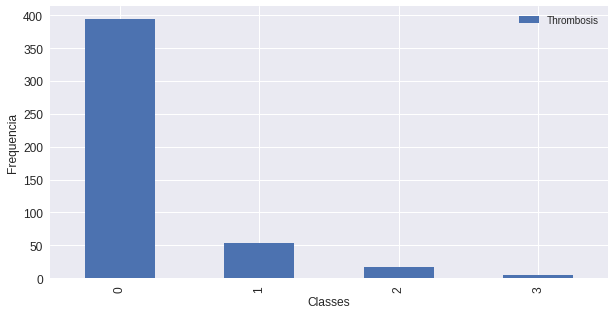

In [29]:
fig, ax = plt.subplots()
df_trombose['Thrombosis'].value_counts().plot(ax=ax, kind='bar', title ="", figsize=(10, 5), legend=True, fontsize=12)

ax.set_xlabel("Classes", fontsize=12)
ax.set_ylabel("Frequencia", fontsize=12)
plt.show()

Existe um grande desbalanceamento nos dados, isto é, muitos exemplos pertencem a classe 0 e muito poucos exemplos as demais classes. <br>
Serão utilizadas técnicas de **Oversampling** utilizando algoritmos que trabalham com foco em classes minoritárias

In [30]:
df_trombose['Thrombosis'].value_counts()

0    394
1     54
2     17
3      5
Name: Thrombosis, dtype: int64

In [31]:
pd.set_option('display.max_column', 110)
df_trombose.describe()

,aCL IgG,aCL IgM,ANA,aCL IgA,KCT,RVVT,LAC,D_ANA Pattern,N_ANA Pattern,P_ANA Pattern,S_ANA Pattern,ABN_Diagnosis,AGA_Diagnosis,AIHA_Diagnosis,AMI_Diagnosis,AP_Diagnosis,APS_Diagnosis,APTT Elongation_Diagnosis,ARF_Diagnosis,Adult Still_Diagnosis,Amyopathic_Diagnosis,Aortitis_Diagnosis,BFP_Diagnosis,BOOP_Diagnosis,Basedow_Diagnosis,Behcet_Diagnosis,Bleeding Colitis_Diagnosis,Budd-Chiari_Diagnosis,CNS_Diagnosis,Cervical Lymphotidis_Diagnosis,Chorea_Diagnosis,Cliogloblin_Diagnosis,Crohn_Diagnosis,Cryoglobulin_Diagnosis,DLE_Diagnosis,DM_Diagnosis,DVT_Diagnosis,EB_Diagnosis,EN_Diagnosis,FLD_Diagnosis,FUO_Diagnosis,HLP_Diagnosis,HT_Diagnosis,Hashimoto_Diagnosis,IP_Diagnosis,IPH_Diagnosis,ITP_Diagnosis,JRA_Diagnosis,LA_Diagnosis,LAC_Diagnosis,LIVER D_Diagnosis,Livedo_Diagnosis,MCTD_Diagnosis,MRA_Diagnosis,NS_Diagnosis,Normal_Diagnosis,OMI_Diagnosis,PH_Diagnosis,PM_Diagnosis,PM0_Diagnosis,PMR_Diagnosis,PN_Diagnosis,PSS_Diagnosis,Paniculitis_Diagnosis,Photosensitivities_Diagnosis,Pleuritis_Diagnosis,Psy_Diagnosis,RA_Diagnosis,RNP_Diagnosis,RPC_Diagnosis,Raynaud_Diagnosis,SLE_Diagnosis,Sarcoidosis_Diagnosis,Sgt_Diagnosis,Sgt4_Diagnosis,SgtIII_Diagnosis,SjS_Diagnosis,Spleen infarction_Diagnosis,TTP_Diagnosis,UC_Diagnosis,UCTD_Diagnosis,Vasculitis _Diagnosis,WG_Diagnosis,WHO2_Diagnosis,WHOIV_Diagnosis,abortion_Diagnosis,anemia_Diagnosis,arthralgia_Diagnosis,autoimmune hepatitis_Diagnosis,autoimmune leukopenia_Diagnosis,brain infarction_Diagnosis,collagen_Diagnosis,depression_Diagnosis,endocarditis_Diagnosis,eosinophilia_Diagnosis,meningitis_Diagnosis,myelopathy_Diagnosis,paniculitis_Diagnosis,polyarthralgia_Diagnosis,preg_Diagnosis,protein loosing _Diagnosis,pulmonary emboli_Diagnosis,thrombocytopenia_Diagnosis,uveitis_Diagnosis,varix_Diagnosis,vasculitis_Diagnosis,vertigo_Diagnosis,Thrombosis
count,4.700000e+02,4.700000e+02,4.700000e+02,4.700000e+02,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.00000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,-1.594469e-17,-2.255879e-17,1.823600e-16,-4.827699e-17,0.318584,0.353982,0.379310,0.019178,0.005479,0.515068,0.679452,0.004255,0.004255,0.004255,0.004255,0.002128,0.070213,0.002128,0.002128,0.006383,0.002128,0.002128,0.004255,0.004255,0.002128,0.023404,0.002128,0.002128,0.006383,0.002128,0.002128,0.004255,0.002128,0.002128,0.002128,0.021277,0.004255,0.002128,0.004255,0.002128,0.012766,0.002128,0.002128,0.002128,0.02766,0.002128,0.010638,0.004255,0.002128,0.002128,0.002128,0.002128,0.059574,0.006383,0.004255,0.002128,0.002128,0.002128,0.034043,0.002128,0.004255,0.010638,0.044681,0.002128,0.002128,0.002128,0.002128,0.125532,0.004255,0.004255,0.014894,0.397872,0.004255,0.002128,0.002128,0.002128,0.246809,0.002128,0.002128,0.008511,0.004255,0.004255,0.002128,0.002128,0.002128,0.008511,0.004255,0.006383,0.002128,0.002128,0.010638,0.008511,0.004255,0.002128,0.002128,0.002128,0.002128,0.002128,0.002128,0.023404,0.002128,0.004255,0.002128,0.006383,0.002128,0.002128,0.002128,0.

In [32]:
df_trombose.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 470 entries, 0 to 803
Columns: 108 entries, aCL IgG to Thrombosis
dtypes: float64(11), int64(97)
memory usage: 400.2 KB


In [33]:
df_trombose.to_csv('pre_processing_trombose.csv', index=False, float_format='%.5f')

## Aumento do número de instâncias da Classe 3

In [34]:
class3 = df_trombose[df_trombose['Thrombosis']==3]
class3

,aCL IgG,aCL IgM,ANA,aCL IgA,KCT,RVVT,LAC,D_ANA Pattern,N_ANA Pattern,P_ANA Pattern,S_ANA Pattern,ABN_Diagnosis,AGA_Diagnosis,AIHA_Diagnosis,AMI_Diagnosis,AP_Diagnosis,APS_Diagnosis,APTT Elongation_Diagnosis,ARF_Diagnosis,Adult Still_Diagnosis,Amyopathic_Diagnosis,Aortitis_Diagnosis,BFP_Diagnosis,BOOP_Diagnosis,Basedow_Diagnosis,Behcet_Diagnosis,Bleeding Colitis_Diagnosis,Budd-Chiari_Diagnosis,CNS_Diagnosis,Cervical Lymphotidis_Diagnosis,Chorea_Diagnosis,Cliogloblin_Diagnosis,Crohn_Diagnosis,Cryoglobulin_Diagnosis,DLE_Diagnosis,DM_Diagnosis,DVT_Diagnosis,EB_Diagnosis,EN_Diagnosis,FLD_Diagnosis,FUO_Diagnosis,HLP_Diagnosis,HT_Diagnosis,Hashimoto_Diagnosis,IP_Diagnosis,IPH_Diagnosis,ITP_Diagnosis,JRA_Diagnosis,LA_Diagnosis,LAC_Diagnosis,LIVER D_Diagnosis,Livedo_Diagnosis,MCTD_Diagnosis,MRA_Diagnosis,NS_Diagnosis,Normal_Diagnosis,OMI_Diagnosis,PH_Diagnosis,PM_Diagnosis,PM0_Diagnosis,PMR_Diagnosis,PN_Diagnosis,PSS_Diagnosis,Paniculitis_Diagnosis,Photosensitivities_Diagnosis,Pleuritis_Diagnosis,Psy_Diagnosis,RA_Diagnosis,RNP_Diagnosis,RPC_Diagnosis,Raynaud_Diagnosis,SLE_Diagnosis,Sarcoidosis_Diagnosis,Sgt_Diagnosis,Sgt4_Diagnosis,SgtIII_Diagnosis,SjS_Diagnosis,Spleen infarction_Diagnosis,TTP_Diagnosis,UC_Diagnosis,UCTD_Diagnosis,Vasculitis _Diagnosis,WG_Diagnosis,WHO2_Diagnosis,WHOIV_Diagnosis,abortion_Diagnosis,anemia_Diagnosis,arthralgia_Diagnosis,autoimmune hepatitis_Diagnosis,autoimmune leukopenia_Diagnosis,brain infarction_Diagnosis,collagen_Diagnosis,depression_Diagnosis,endocarditis_Diagnosis,eosinophilia_Diagnosis,meningitis_Diagnosis,myelopathy_Diagnosis,paniculitis_Diagnosis,polyarthralgia_Diagnosis,preg_Diagnosis,protein loosing _Diagnosis,pulmonary emboli_Diagnosis,thrombocytopenia_Diagnosis,uveitis_Diagnosis,varix_Diagnosis,vasculitis_Diagnosis,vertigo_Diagnosis,Thrombosis
46,-0.152410,-0.047046,-0.447805,-0.049341,0.318584,0.353982,0.37931,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
50,-0.152410,-0.045991,-0.447805,-0.049341,1.000000,1.000000,1.00000,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
89,-0.143052,-0.046687,-0.447805,-0.043127,0.000000,0.000000,0.00000,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
96,-0.137037,-0.046849,3.278538,-0.049341,0.000000,0.000000,0.00000,1.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
268,2.348107,-0.034787,-0.403966,-0.029625,1.000000,1.000000,1.00000,0.0,0.0,0.0,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [35]:
df_trombose = pd.concat([df_trombose,class3], axis=0)

In [36]:
df_trombose.shape

(475, 108)

In [37]:
df_trombose.head()

,aCL IgG,aCL IgM,ANA,aCL IgA,KCT,RVVT,LAC,D_ANA Pattern,N_ANA Pattern,P_ANA Pattern,S_ANA Pattern,ABN_Diagnosis,AGA_Diagnosis,AIHA_Diagnosis,AMI_Diagnosis,AP_Diagnosis,APS_Diagnosis,APTT Elongation_Diagnosis,ARF_Diagnosis,Adult Still_Diagnosis,Amyopathic_Diagnosis,Aortitis_Diagnosis,BFP_Diagnosis,BOOP_Diagnosis,Basedow_Diagnosis,Behcet_Diagnosis,Bleeding Colitis_Diagnosis,Budd-Chiari_Diagnosis,CNS_Diagnosis,Cervical Lymphotidis_Diagnosis,Chorea_Diagnosis,Cliogloblin_Diagnosis,Crohn_Diagnosis,Cryoglobulin_Diagnosis,DLE_Diagnosis,DM_Diagnosis,DVT_Diagnosis,EB_Diagnosis,EN_Diagnosis,FLD_Diagnosis,FUO_Diagnosis,HLP_Diagnosis,HT_Diagnosis,Hashimoto_Diagnosis,IP_Diagnosis,IPH_Diagnosis,ITP_Diagnosis,JRA_Diagnosis,LA_Diagnosis,LAC_Diagnosis,LIVER D_Diagnosis,Livedo_Diagnosis,MCTD_Diagnosis,MRA_Diagnosis,NS_Diagnosis,Normal_Diagnosis,OMI_Diagnosis,PH_Diagnosis,PM_Diagnosis,PM0_Diagnosis,PMR_Diagnosis,PN_Diagnosis,PSS_Diagnosis,Paniculitis_Diagnosis,Photosensitivities_Diagnosis,Pleuritis_Diagnosis,Psy_Diagnosis,RA_Diagnosis,RNP_Diagnosis,RPC_Diagnosis,Raynaud_Diagnosis,SLE_Diagnosis,Sarcoidosis_Diagnosis,Sgt_Diagnosis,Sgt4_Diagnosis,SgtIII_Diagnosis,SjS_Diagnosis,Spleen infarction_Diagnosis,TTP_Diagnosis,UC_Diagnosis,UCTD_Diagnosis,Vasculitis _Diagnosis,WG_Diagnosis,WHO2_Diagnosis,WHOIV_Diagnosis,abortion_Diagnosis,anemia_Diagnosis,arthralgia_Diagnosis,autoimmune hepatitis_Diagnosis,autoimmune leukopenia_Diagnosis,brain infarction_Diagnosis,collagen_Diagnosis,depression_Diagnosis,endocarditis_Diagnosis,eosinophilia_Diagnosis,meningitis_Diagnosis,myelopathy_Diagnosis,paniculitis_Diagnosis,polyarthralgia_Diagnosis,preg_Diagnosis,protein loosing _Diagnosis,pulmonary emboli_Diagnosis,thrombocytopenia_Diagnosis,uveitis_Diagnosis,varix_Diagnosis,vasculitis_Diagnosis,vertigo_Diagnosis,Thrombosis
0,-0.143721,-0.046861,-0.228608,-0.049341,0.318584,0.353982,0.00000,0.000000,0.000000,1.000000,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,-0.123670,-0.046513,-0.228608,-0.047866,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.137037,-0.046757,-0.462418,-0.047776,0.318584,0.353982,0.37931,0.019178,0.005479,0.515068,0.679452,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.152410,-0.046583,-0.458765,-0.049341,0.318584,0.353982,0.37931,0.000000,0.000000,1.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,-0.145726,-0.046768,0.472821,-0.049341,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
df_trombose.to_csv('pre_processing_trombose.csv', index=False, float_format='%.5f')